<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('robbery.csv')
df.head()


,crimecode,occ_date,occ_time,occ_month,occ_week,occ_year,location,offence,weapons used,lat,long,light
0,4786321,8/17/2016,15:03,August,Friday,2014,street,robbery and murder,riffle,43.653210,-79.381287,day
1,4676906,10-05-2016,08:55,October,Thursday,2016,residence,robbery and murder,riffle,43.785351,-79.278572,day
2,4789749,10/17/2016,15:03,October,Sunday,2016,residence,robbery and murder and murder,riffle,43.700970,-79.399261,night
3,4789765,10/17/2016,15:03,October,Sunday,2014,street,robbery and murder,knife,43.739391,-79.513222,night
4,4677901,10/15/2016,08:55,October,Sunday,2016,residence,robbery and murder and murder,firearms,43.720444,-79.551483,night


In [3]:
df.shape


(49, 12)

In [4]:
df['occ_date'] = pd.to_datetime(df['occ_date'])
df.head()


,crimecode,occ_date,occ_time,occ_month,occ_week,occ_year,location,offence,weapons used,lat,long,light
0,4786321,2016-08-17,15:03,August,Friday,2014,street,robbery and murder,riffle,43.653210,-79.381287,day
1,4676906,2016-10-05,08:55,October,Thursday,2016,residence,robbery and murder,riffle,43.785351,-79.278572,day
2,4789749,2016-10-17,15:03,October,Sunday,2016,residence,robbery and murder and murder,riffle,43.700970,-79.399261,night
3,4789765,2016-10-17,15:03,October,Sunday,2014,street,robbery and murder,knife,43.739391,-79.513222,night
4,4677901,2016-10-15,08:55,October,Sunday,2016,residence,robbery and murder and murder,firearms,43.720444,-79.551483,night


In [5]:
df['weapons used'].value_counts()


riffle      22
knife       13
firearms     8
ironrods     6
Name: weapons used, dtype: int64

In [6]:
df['weapons used'].replace(to_replace=['riffle','firearms','ironrods','knife'], value=[0,1,2,3],inplace=True)
df.head()

,crimecode,occ_date,occ_time,occ_month,occ_week,occ_year,location,offence,weapons used,lat,long,light
0,4786321,2016-08-17,15:03,August,Friday,2014,street,robbery and murder,0,43.653210,-79.381287,day
1,4676906,2016-10-05,08:55,October,Thursday,2016,residence,robbery and murder,0,43.785351,-79.278572,day
2,4789749,2016-10-17,15:03,October,Sunday,2016,residence,robbery and murder and murder,0,43.700970,-79.399261,night
3,4789765,2016-10-17,15:03,October,Sunday,2014,street,robbery and murder,3,43.739391,-79.513222,night
4,4677901,2016-10-15,08:55,October,Sunday,2016,residence,robbery and murder and murder,1,43.720444,-79.551483,night


In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [8]:
df['weapons used'].value_counts()


0    22
3    13
1     8
2     6
Name: weapons used, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1021ac2940>]],
      dtype=object)

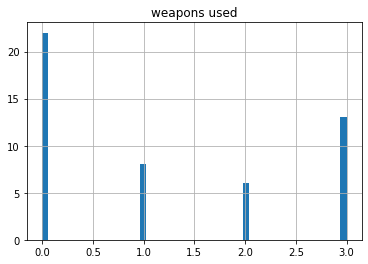

In [9]:
df.hist(column='weapons used', bins=50)


In [10]:
df.columns


Index(['crimecode', 'occ_date', 'occ_time', 'occ_month', 'occ_week',
       'occ_year', 'location', 'offence', 'weapons used', 'lat', 'long',
       'light'],
      dtype='object')

In [20]:
X = df[['crimecode','occ_year', 'weapons used', 'lat', 'long']] .values  #.astype(float)
X[0:5]


array([[ 4.78632100e+06,  2.01400000e+03,  0.00000000e+00,
         4.36532097e+01, -7.93812866e+01],
       [ 4.67690600e+06,  2.01600000e+03,  0.00000000e+00,
         4.37853508e+01, -7.92785721e+01],
       [ 4.78974900e+06,  2.01600000e+03,  0.00000000e+00,
         4.37009697e+01, -7.93992615e+01],
       [ 4.78976500e+06,  2.01400000e+03,  3.00000000e+00,
         4.37393913e+01, -7.95132217e+01],
       [ 4.67790100e+06,  2.01600000e+03,  1.00000000e+00,
         4.37204437e+01, -7.95514832e+01]])

In [21]:
y = df['weapons used'].values
y[0:5]


array([0, 0, 0, 3, 1])

In [22]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]


array([[ 0.37871695, -1.77237252, -0.95459758, -1.48598081,  0.04922215],
       [-1.43685975, -0.31277162, -0.95459758,  1.33954767,  0.96542198],
       [ 0.43559943, -0.31277162, -0.95459758, -0.46474487, -0.1111116 ],
       [ 0.43586492, -1.77237252,  1.42380656,  0.35681122, -1.1276216 ],
       [-1.42034923, -0.31277162, -0.1617962 , -0.04833891, -1.46890915]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (39, 5) (39,)
Test set: (10, 5) (10,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [26]:
yhat = neigh.predict(X_test)
yhat[0:5]


array([0, 0, 3, 1, 1])

In [27]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.8717948717948718
Test set Accuracy:  0.8
